In [3]:
!pip install -q sympy
!pip install -q nbinteract

import sympy
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Right now I'm thinking that it could be cool to turn this demo into a webpage and use nbinteract. That way the students are able to not have to deal w/ the potential problems that a notebook environment may present. [demo](https://www.nbinteract.com/). There are also pretty cool quiz features that could be made use of. All of the code could be hidden w/ a custom build, then we'd just have the markdown and outputs (the interactive graphs) exposed.

look for inspiration from https://github.com/SeanMcOwen/FinanceAndPython.com-EconomicFoundations and http://moneymarketsandmisperceptions.blogspot.com/2016/09/building-supply-and-demand-graphs-in.html

## Solving Equations with SymPy

If we use nbinteract, we'll be able to just use SymPy in the background and not have to show them how to use it (especially as their first introduction to python). We could just make a widget where they can plug in parameters for an equation and it gets solved.

If we want them to be able to make multiple equations, we could add a dictionary where they name and create the equations (and that could be as code-heavy as it gets). Another idea is to make the whole notebook run off of a single supply and single demand equation that is defined at the beginning of the notebook.

In [6]:
x = sympy.Symbol("x")

In [10]:
x

x

In [11]:
x*x

x**2

In [12]:
x*3 + 4

3*x + 4

In [15]:
supply = 3*x + 4
supply

3*x + 4

In [17]:
supply.subs(x,3)

13

In [21]:
demand = -4*x+2
demand

-4*x + 2

In [29]:
p_star = sympy.solve(demand-supply)[0]
p_star

-2/7

In [35]:
demand.subs(x, p_star)

22/7

In [36]:
supply.subs(x, p_star)

22/7

## Visualizing those supply and demand equations

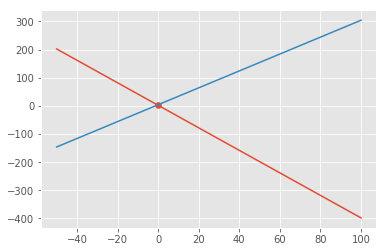

In [83]:
def plot_equation(equation, price_start, price_end, label=None):
    plot_prices = [price_start, price_end]
    plot_quantities = [equation.subs(list(equation.free_symbols)[0], c) for c in plot_prices]
    plt.plot(plot_prices, plot_quantities, label=label)
    
def plot_intercept(eq1, eq2):
    ex = sympy.solve(eq1-eq2)[0]
    why = eq1.subs(list(eq1.free_symbols)[0], ex)
    plt.scatter([ex], [why])
    
plot_equation(demand, -50, 100)
plot_equation(supply, -50, 100)
plot_intercept(supply, demand)

## Adding Sliders

In [88]:
from ipywidgets import interact
import nbinteract as nbi

In [93]:
nbi.multiple_choice(question="What can cause a rightward shift in the demand curve?",
                    choices=['The enactment of a price ceiling', 'The invention of more efficient manufacturing process', 'A change in consumer preferences'],
                    answers=2)

VBox(children=(HTML(value='<p style="line-height:18px;">What can cause a rightward shift in the demand curve?</p>'), HBox(children=(Button(layout=Layout(height='20px', padding='0', width='20px'), style=ButtonStyle()), HTML(value='<p style="line-height:18px;">The enactment of a price ceiling</p>')), layout=Layout(align_items='center')), HBox(children=(Button(layout=Layout(height='20px', padding='0', width='20px'), style=ButtonStyle()), HTML(value='<p style="line-height:18px;">The invention of more efficient manufacturing process</p>')), layout=Layout(align_items='center')), HBox(children=(Button(layout=Layout(height='20px', padding='0', width='20px'), style=ButtonStyle()), HTML(value='<p style="line-height:18px;">A change in consumer preferences</p>')), layout=Layout(align_items='center'))))

In [85]:
# need to move supply to outside of functions (for interchangability)
# add in equilibriums

def plot_shift(equation):
    def shift_helper(shift):
        plot_equation(equation + shift, -10, 10, 'shifted')
        plot_equation(equation, -10, 10)
        plot_equation(supply, -10, 10)
        plt.xlim(-10,10)
        plt.ylim(-10,30)
        plt.legend()
    interact(shift_helper, shift=(-9, 9, 3))

plot_shift(demand)

interactive(children=(IntSlider(value=0, description='shift', max=9, min=-9, step=3), Output()), _dom_classes=('widget-interact',))

## Shifts in Intercept

## Effects of Taxes, Tariffs, Floors, and Ceilings

## Shifts in Slope and effect on DWL, etc.